**To adapt this notebook to your own needs** and to be able to edit it, please make a copy of your own. This works via "*File*" -> "*Save a copy ..*."


---



In Sect. [2.10 Language Models and N-Grams](https://docs.google.com/presentation/d/19ZZW_DylGmEU4ZJJry-3HzHjUk7qWUUIFMZJNcpuzWc/edit?usp=sharing) of the **ISE lecture** we introduce the concept of **document corpora**.  In this notebook, you will learn how to access and how to work with a corpus with the help of the python NLTK library.

A **corpus** is a computer-readable collection of text or speech. NLTK provides several corpora to work with. We chose the "Gutenberg" corpus, which consists of texts from the [Project Gutenberg](https://www.gutenberg.org/).

In [ ]:
#First we have to import nltk and download a few required packages 
import nltk
#We choose the gutenberg corpus ...
nltk.download('gutenberg')
nltk.download('punkt')

#...and have a look, which texts are contained in it
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let's take a sample text, as e.g. **Shakespeare's Julius Caesar** (`shakespeare-caesar.txt`). First, let's count all the contained words.

In [ ]:
#We shortcut to gutenberg to keep sequences shorter
from nltk.corpus import gutenberg

caesar = gutenberg.words('shakespeare-caesar.txt') #creates a list of words from the text
print(caesar[:20])

#How many words are in the text?
len(caesar)

['[', 'The', 'Tragedie', 'of', 'Julius', 'Caesar', 'by', 'William', 'Shakespeare', '1599', ']', 'Actus', 'Primus', '.', 'Scoena', 'Prima', '.', 'Enter', 'Flauius', ',']


25833

What is the **vocabulary size** of Shakespeare's Julius Caesar?

In [ ]:
vocabulary = set(caesar)
len(vocabulary)

3560

In corpus linguistics, a simple **concordance** is a list of examples of a word as they occur in a corpus, presented so that the linguist can read them in the context in which they occur in the text.

Show me the concordances of "`kill`" in Shakespeare's *Julius Caesar*

In [ ]:
caesar2=nltk.Text(caesar)
caesar2.concordance("kill")

Displaying 9 of 9 matches:
 as his kinde grow mischieuous ; And kill him in the shell . Enter Lucius . Lu
or it . And gentle Friends , Let ' s kill him Boldly , but not Wrathfully : Le
uenge About , seeke , burne , fire , kill , slay , Let not a Traitor liue Ant 
eueng ' d , Euen with the Sword that kill ' d thee Pin . So , I am free , Yet 
 : There is so much , that thou wilt kill me straight : Kill Brutus , and be h
 , that thou wilt kill me straight : Kill Brutus , and be honour ' d in his de
ce then , no words Clit . Ile rather kill my selfe Brut . Hearke thee , Dardan
 did Brutus make to thee ? Dard . To kill him , Clitus : looke he meditates Cl
Strato . - Caesar , now be still , I kill ' d not thee with halfe so good a wi


Look for **semantically similar words** for a given word (in the context of the corpus). 

In [ ]:
caesar2.similar('kill')

deny bad do see keepe after turne tell talk meete fear second hisse
forgaue vrg carue fetch ask visit threaten


A **Dispersion Plot** shows where in a text file specific words occur.

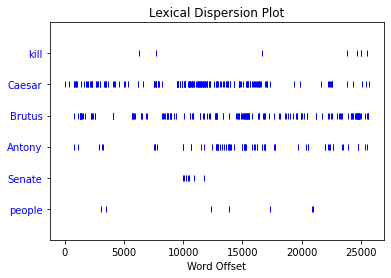

In [ ]:
caesar2.dispersion_plot(["kill", "Caesar", "Brutus", "Antony", "Senate", "people"])

Plot a **frequency distribution** off the 50 most frequent words

In [ ]:
frequency_dist = nltk.FreqDist(caesar)
frequency_dist.tabulate(50) #print the 50 most frequent words


      ,       .       I     the       :     and       '      to     you      of       ?     not       a      is     And       d      in    that  Caesar      my      me      it     him  Brutus     Bru     his    this    your      be    with      he    will    haue     for      do      so   shall   Cassi       ;    thou      as     are     all    That Cassius      by      we    then     our      on 
   2204    1296     531     502     499     409     384     370     342     336     296     249     240     230     218     215     204     200     189     188     187     166     165     161     153     150     141     137     132     131     129     129     128     118     110     109     107     107     106     100     100      96      90      89      85      82      82      79      79      78 


Probably, we should first remove punctuation and change all words to lower case (**Preprocessing**)

In [ ]:
#word should be lowercase (lower()), remove all punctuation (isalpha())
frequency_dist = nltk.FreqDist(word.lower() for word in caesar if word.isalpha())
frequency_dist.tabulate(50)

    and     the       i      to     you      of    that       a     not      is      in       d      my      it  caesar      me      he     for    this     him    will  brutus     his     bru    with    your    haue      be     but      so      as    what   shall      do    thou     are     all    then   cassi      by      we      no     our cassius      if      on     did  antony    come       o 
    627     579     533     446     391     354     289     267     257     253     225     215     209     198     190     188     177     176     166     166     163     161     157     153     150     149     148     147     141     139     133     129     125     122     115     109     109     107     107     100      95      93      93      85      84      82      82      75      74      71 


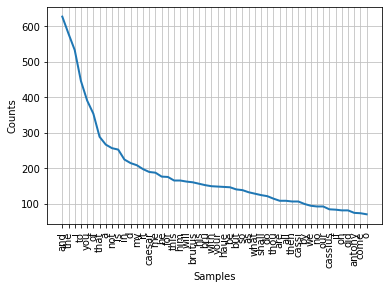

In [ ]:
frequency_dist.plot(50) #we can easily plot the frequency distribution

We now try to demonstrate **Zipf's Law.** 

[Zipf’s law](https://en.wikipedia.org/wiki/Zipf%27s_law) states that given some corpus of natural language utterances, **the frequency f of any word is inversely proportional to its rank n** in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation.

 ![alt text](http://scihi.org/wp-content/uploads/2019/05/Bildschirmfoto-2019-05-19-um-16.58.03-e1558277954111.jpg)



Since FreqDist cannot (easily) be used for manipulations on the data, we first have to **copy our FreqDist into a dictionary**:

In [ ]:
data = [] # create a dictionary
for k in frequency_dist: #copy frequency_dist into the dictionary
    data.append((k, frequency_dist[k]))
data.sort(key=lambda tup: tup[1], reverse=True) # order the data in the dictionary from the highest to the lowest

data[:10] #show us the first 10 enties of the dictionary

[('and', 627),
 ('the', 579),
 ('i', 533),
 ('to', 446),
 ('you', 391),
 ('of', 354),
 ('that', 289),
 ('a', 267),
 ('not', 257),
 ('is', 253)]

Now we plot the word frequency distribution (like before...)

Text(0, 0.5, 'Frequency')

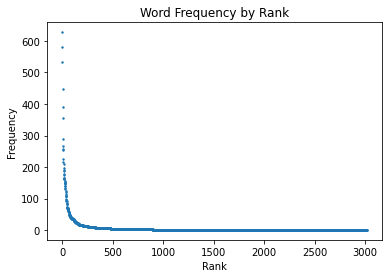

In [ ]:
#we need the mathplotlib library for plotting and for math
%matplotlib inline
import matplotlib.pyplot as plt
import math

xs = range(1, len(data) + 1)
plt.scatter(xs, [f[1] for f in data ], s=2) #do a scatter plot of the (numerical) data in the dictionary (=f[1])

#labels for the diagram
plt.title("Word Frequency by Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")

Zipf's law is most easily observed by plotting the data on a [log-log graph](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot), with the axes being **log (rank order)** and **log (frequency)**. In science and engineering, a log–log graph uses logarithmic scales on both the horizontal and vertical axes. Monomials – relationships of the form `y=ax^k` appear as straight lines in a log–log graph.

Text(0, 0.5, 'log(Frequency)')

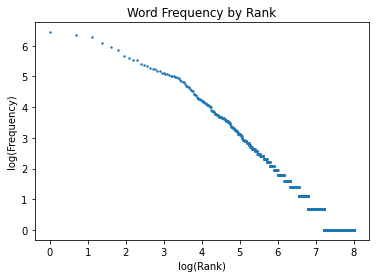

In [ ]:
#now plot a log-log graph for the data, i.e. transform x and y values with log(x) and log(y)
plt.scatter([math.log(x) for x in xs], [math.log(f[1]) for f in data], s=2)

#new labels
plt.title("Word Frequency by Rank")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")

To better demonstrate that our plot follows Zipf's law, we **add the graph for 1/n** to the plot. 

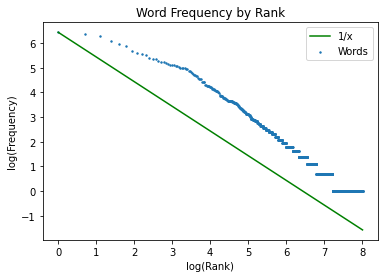

In [ ]:
#first our scatter plot of the log-log graph
plt.scatter([math.log(x) for x in xs], [math.log(f[1]) for f in data], s=2, label="Words")
#followed by plotting a line with 1/x
plt.plot([math.log(x) for x in xs], [math.log(data[0][1] / x) for x in xs], color="g", label="1/x")

#with new labels
plt.title("Word Frequency by Rank")
plt.xlabel("log(Rank)")
plt.ylabel("log(Frequency)")
plt.legend()



---


Now you can try out these plots for yourself with

1.   other texts of the corpus or
2.   an entire corpus

to see how well the frequency distributions adapt to 1/n







More information on how to use corpora with NLTK:


*   Steven Bird, Ewan Klein, and Edward Loper: [Natural Language Processing with Python
– Analyzing Text with the Natural Language Toolkit](https://www.nltk.org/book/), O'Reilly Media, 2009
> * Chap 2: [Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html)



